<a href="https://colab.research.google.com/github/beyzoskaya/Hierarchical-Binding-Site-Pred/blob/main/Hierarchical_graph_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython networkx
!apt-get install -y dssp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 69.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcifpp-data libcifpp2
The following NEW packages will be installed:
  dssp libcifpp-data libcifpp2
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,967 kB of archives.
After this operation, 15.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcifpp-data all 2.0.5-1build1 [437 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcifpp2 amd64 2.0.5-1build1 [1,019 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dssp amd64 4.0.4-1 [511 kB]
Fetched 1,967 kB in 1s (2,225 kB/s)
Preconfiguring packages ...
Selecting previously unselected package libcifpp-data.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .

In [ ]:
import os
from Bio.PDB import PDBList

pdb_ids = ['1TIM', '4HHB', '2DN2', '1MBO', '1STP']  # example PDB IDs

pdbl = PDBList()
os.makedirs("pdbs", exist_ok=True)

for pdb_id in pdb_ids:
    pdbl.retrieve_pdb_file(pdb_id, pdir='pdbs', file_format='pdb')

In [ ]:
from Bio.PDB import PDBParser, DSSP
import os

parser = PDBParser()
for pdb_id in pdb_ids:
    old_file = f"pdbs/pdb{pdb_id.lower()}.ent"
    new_file = f"pdbs/{pdb_id}.pdb"
    os.rename(old_file, new_file)

    structure = parser.get_structure(pdb_id, new_file)
    model = structure[0]

    dssp = DSSP(model, new_file)
    print(f"{pdb_id}: first 10 residues' SS: {[dssp[key][2] for key in list(dssp.keys())[:10]]}")

/usr/local/lib/python3.11/dist-packages/Bio/PDB/DSSP.py:199: UserWarning: Unknown or untrusted program in REMARK 3, trying all parsers to see if there is a match

  warnings.warn(err)
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5273.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5316.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5360.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5403.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5447.
  warnings.warn(
/usr/l

1TIM: first 10 residues' SS: ['-', '-', '-', '-', '-', 'E', 'E', 'E', 'E', 'E']


/usr/local/lib/python3.11/dist-packages/Bio/PDB/DSSP.py:199: UserWarning: Unknown or untrusted program in REMARK 3, trying all parsers to see if there is a match

  warnings.warn(err)
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9223.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9309.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9395.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9481.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9567.
  warnings.warn(
/usr/l

4HHB: first 10 residues' SS: ['-', '-', '-', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
2DN2: first 10 residues' SS: ['-', '-', '-', 'H', 'H', 'H', 'H', 'H', 'H', 'H']


/usr/local/lib/python3.11/dist-packages/Bio/PDB/DSSP.py:199: UserWarning: Unknown or untrusted program in REMARK 3, trying all parsers to see if there is a match

  warnings.warn(err)


1MBO: first 10 residues' SS: ['-', '-', '-', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
1STP: first 10 residues' SS: ['-', 'H', 'H', 'H', 'H', '-', 'E', 'E', 'E', 'E']


Test on one protein sequence with resiude level and SSE level graph plotting

In [ ]:
import networkx as nx

G_residue = nx.Graph()

# Loop over keys, then get values directly
for key in dssp.keys():
    d = dssp[key]
    res_id = key[1][1]        # residue number
    ss = d[2]                 # secondary structure (H, E, etc.)
    G_residue.add_node(res_id, ss=ss)

# Add edges: simple sequential neighbors
res_ids = list(G_residue.nodes)
for i in range(len(res_ids) - 1):
    G_residue.add_edge(res_ids[i], res_ids[i+1])

print("Graph created with", G_residue.number_of_nodes(), "residues.")
print("First few nodes:", list(G_residue.nodes(data=True))[:5])

Graph created with 121 residues.
First few nodes: [(13, {'ss': '-'}), (14, {'ss': 'H'}), (15, {'ss': 'H'}), (16, {'ss': 'H'}), (17, {'ss': 'H'})]


In [ ]:
sse_list = []
current_sse = None

for key in dssp.keys():
    d = dssp[key]
    ss = d[2]
    res_id = key[1][1]
    if ss in ['H', 'E']:  # only helices & strands
        if current_sse and current_sse['type'] == ss:
            current_sse['residues'].append(res_id)
        else:
            if current_sse:
                sse_list.append(current_sse)
            current_sse = {'type': ss, 'residues': [res_id]}
    else:
        if current_sse:
            sse_list.append(current_sse)
            current_sse = None

if current_sse:
    sse_list.append(current_sse)

print(f"Found {len(sse_list)} SSEs: {[len(s['residues']) for s in sse_list]}")

Found 9 SSEs: [4, 5, 6, 7, 7, 10, 13, 10, 9]


In [ ]:
G_sse = nx.Graph()
for i, sse in enumerate(sse_list):
    G_sse.add_node(i, type=sse['type'], length=len(sse['residues']))

# Connect consecutive SSEs
for i in range(len(sse_list)-1):
    G_sse.add_edge(i, i+1)

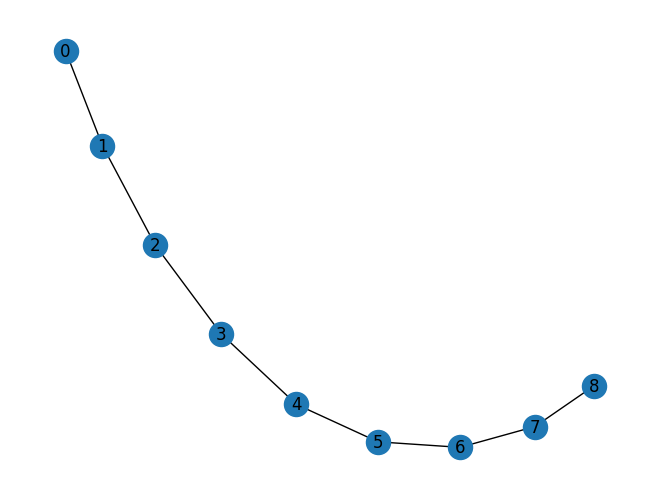

In [ ]:
import matplotlib.pyplot as plt

nx.draw(G_sse, with_labels=True)
plt.show()

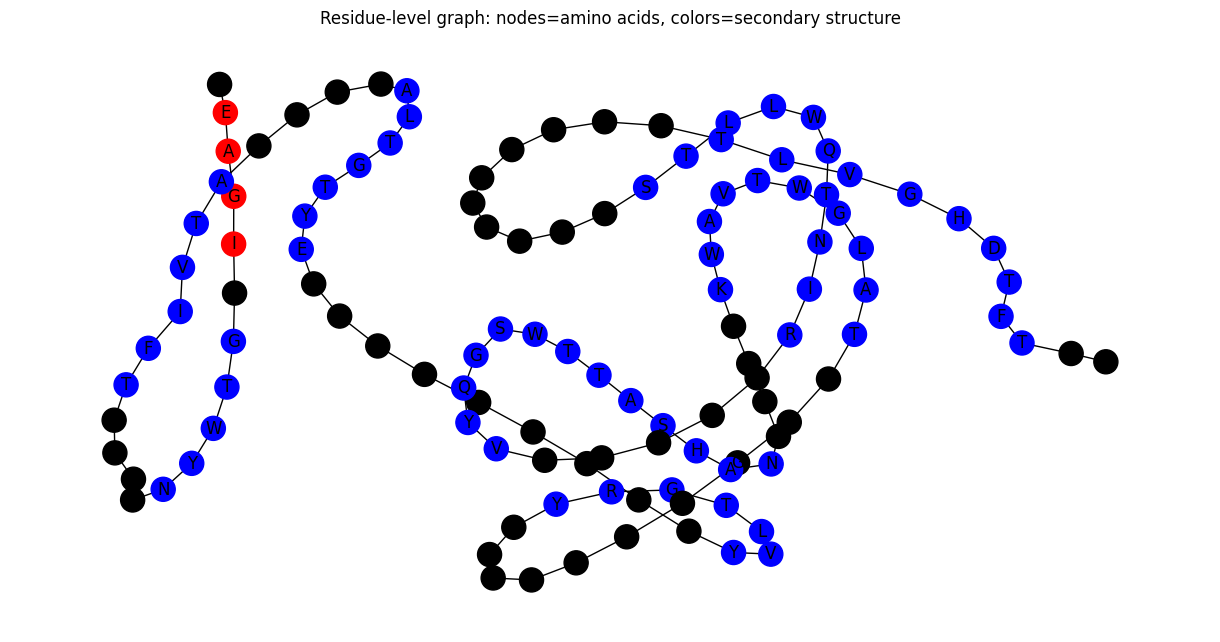

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# residue-level graph
G_residue = nx.Graph()

# residue nodes with label = amino acid and secondary structure info for coloring
for key in dssp.keys():
    res_id = key[1][1]  # residue number
    aa = dssp[key][1]   # amino acid (1-letter code)
    ss = dssp[key][2]   # secondary structure type (H,E,C,...)
    G_residue.add_node(res_id, aa=aa, ss=ss)

# edges between sequential residues
res_ids = sorted(G_residue.nodes)
for i in range(len(res_ids)-1):
    G_residue.add_edge(res_ids[i], res_ids[i+1])

# labels for nodes: amino acid letter
res_labels = {n: G_residue.nodes[n]['aa'] for n in G_residue.nodes}

# Color map for secondary structure types
ss_colors = {'H': 'red', 'E': 'blue', 'C': 'gray'}
node_colors = [ss_colors.get(G_residue.nodes[n]['ss'], 'black') for n in G_residue.nodes]

# residue-level graph
plt.figure(figsize=(12,6))
pos = nx.spring_layout(G_residue, seed=42)
nx.draw(G_residue, pos, labels=res_labels, node_color=node_colors, with_labels=True, node_size=300)
plt.title("Residue-level graph: nodes=amino acids, colors=secondary structure")
plt.show()

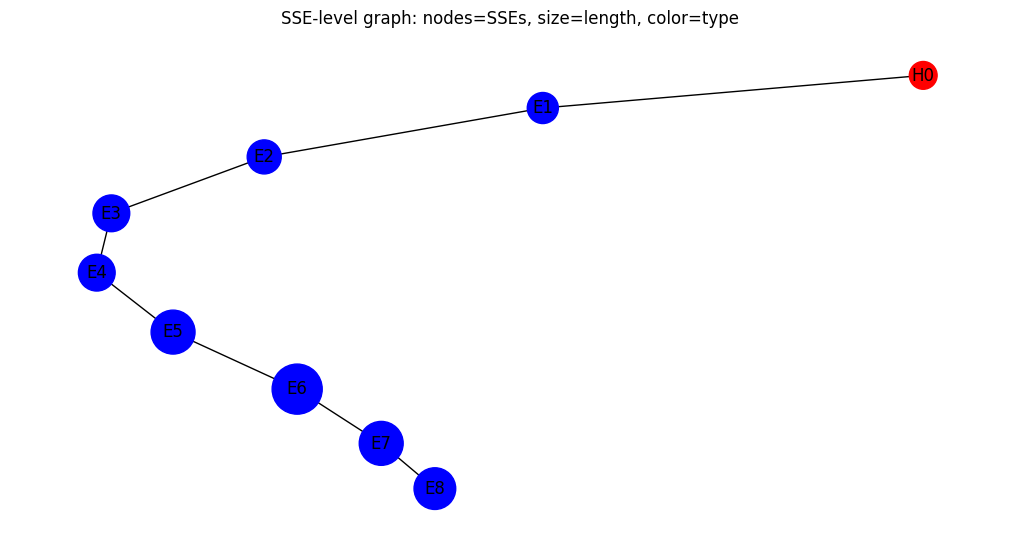

In [ ]:
# Build SSE-level graph
G_sse = nx.Graph()

# SSE nodes: label by SSE type and size by length
for i, sse in enumerate(sse_list):
    sse_type = sse['type']
    length = len(sse['residues'])
    G_sse.add_node(i, type=sse_type, length=length)

# Connect consecutive SSEs with edges
for i in range(len(sse_list)-1):
    G_sse.add_edge(i, i+1)

# labels for SSE nodes
sse_labels = {i: f"{G_sse.nodes[i]['type']}{i}" for i in G_sse.nodes}
# Node sizes proportional to length * scaling factor
sse_sizes = [G_sse.nodes[i]['length']*100 for i in G_sse.nodes]

# Color map for SSE type
sse_colors = {'H': 'red', 'E': 'blue'}
sse_node_colors = [sse_colors.get(G_sse.nodes[i]['type'], 'gray') for i in G_sse.nodes]

# SSE-level graph
plt.figure(figsize=(10,5))
pos_sse = nx.spring_layout(G_sse, seed=42)
nx.draw(G_sse, pos_sse, labels=sse_labels, node_size=sse_sizes, node_color=sse_node_colors, with_labels=True)
plt.title("SSE-level graph: nodes=SSEs, size=length, color=type")
plt.show()

Try creating resiude level and SSE level graph with ESM-2 embedding initialization

In [ ]:
!pip install fair-esm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
!pip show fair-esm

Name: fair-esm
Version: 2.0.0
Summary: Evolutionary Scale Modeling (esm): Pretrained language models for proteins. From Facebook AI Research.
Home-page: https://github.com/facebookresearch/esm
Author: Facebook AI Research
Author-email: 
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 


In [ ]:
!pip install --upgrade fair-esm

In [ ]:
import esm

print(dir(esm.pretrained))

['ESM2', 'Namespace', 'Path', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_download_model_and_regression_data', '_has_regression_weights', '_load_model_and_alphabet_core_v1', '_load_model_and_alphabet_core_v2', 'esm', 'esm1_t12_85M_UR50S', 'esm1_t34_670M_UR100', 'esm1_t34_670M_UR50D', 'esm1_t34_670M_UR50S', 'esm1_t6_43M_UR50S', 'esm1b_t33_650M_UR50S', 'esm1v_t33_650M_UR90S', 'esm1v_t33_650M_UR90S_1', 'esm1v_t33_650M_UR90S_2', 'esm1v_t33_650M_UR90S_3', 'esm1v_t33_650M_UR90S_4', 'esm1v_t33_650M_UR90S_5', 'esm2_t12_35M_UR50D', 'esm2_t30_150M_UR50D', 'esm2_t33_650M_UR50D', 'esm2_t36_3B_UR50D', 'esm2_t48_15B_UR50D', 'esm2_t6_8M_UR50D', 'esm_if1_gvp4_t16_142M_UR50', 'esm_msa1_t12_100M_UR50S', 'esm_msa1b_t12_100M_UR50S', 'esmfold_v0', 'esmfold_v1', 'has_emb_layer_norm_before', 'load_hub_workaround', 'load_model_and_alphabet', 'load_model_and_alphabet_core', 'load_model_and_alphabet_hub', 'load_model_and_alphabet_local', 'load_regr

In [ ]:
import esm
import torch

# Load ESM-2 model
model, alphabet = esm.pretrained.load_model_and_alphabet("esm2_t33_650M_UR50D")
model.eval()
batch_converter = alphabet.get_batch_converter()

# Example protein sequences
sequences = [("prot1", "MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQ")]

batch_labels, batch_strs, batch_tokens = batch_converter(sequences)

with torch.no_grad():
    results = model(batch_tokens, repr_layers=[33], return_contacts=False)
    token_representations = results["representations"][33]

# per-residue embeddings (exclude start/end tokens)
embeddings = token_representations[0, 1:-1, :]  # shape: (seq_len, embedding_dim)
print(f"Shape of embeddings: {embeddings.shape}")

Shape of embeddings: torch.Size([33, 1280])


In [ ]:
from Bio.PDB import PDBParser
from Bio.PDB.Polypeptide import PPBuilder

parser = PDBParser()
structure = parser.get_structure("1STP", "/content/pdbs/1STP.pdb")

chain = structure[0]['A']  # correct chain id

# Build list of residue numbers in order other than that builded graph give an index error
ppb = PPBuilder()
residue_numbers = []
for pp in ppb.build_peptides(chain):
    for res in pp:
        residue_numbers.append(res.get_id()[1])

print("Residue numbers:", residue_numbers)

Residue numbers: [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]


In [ ]:
from Bio.PDB.DSSP import DSSP

model = structure[0]
dssp = DSSP(model, "/content/pdbs/1STP.pdb")

# DSSP keys are tuples like: (chain_id, (' ', resseq, ' '))
dssp_residues = {}
for key in dssp.keys():
    print(f"Key: {key}")
    resseq = key[1][1]
    print(f"resseq: {resseq}")
    ss = dssp[key][2]
    print(f"ss: {ss}")
    dssp_residues[resseq] = ss
    print(f"dssp residues: {dssp_residues}")

Key: ('A', (' ', 13, ' '))
resseq: 13
ss: -
dssp residues: {13: '-'}
Key: ('A', (' ', 14, ' '))
resseq: 14
ss: H
dssp residues: {13: '-', 14: 'H'}
Key: ('A', (' ', 15, ' '))
resseq: 15
ss: H
dssp residues: {13: '-', 14: 'H', 15: 'H'}
Key: ('A', (' ', 16, ' '))
resseq: 16
ss: H
dssp residues: {13: '-', 14: 'H', 15: 'H', 16: 'H'}
Key: ('A', (' ', 17, ' '))
resseq: 17
ss: H
dssp residues: {13: '-', 14: 'H', 15: 'H', 16: 'H', 17: 'H'}
Key: ('A', (' ', 18, ' '))
resseq: 18
ss: -
dssp residues: {13: '-', 14: 'H', 15: 'H', 16: 'H', 17: 'H', 18: '-'}
Key: ('A', (' ', 19, ' '))
resseq: 19
ss: E
dssp residues: {13: '-', 14: 'H', 15: 'H', 16: 'H', 17: 'H', 18: '-', 19: 'E'}
Key: ('A', (' ', 20, ' '))
resseq: 20
ss: E
dssp residues: {13: '-', 14: 'H', 15: 'H', 16: 'H', 17: 'H', 18: '-', 19: 'E', 20: 'E'}
Key: ('A', (' ', 21, ' '))
resseq: 21
ss: E
dssp residues: {13: '-', 14: 'H', 15: 'H', 16: 'H', 17: 'H', 18: '-', 19: 'E', 20: 'E', 21: 'E'}
Key: ('A', (' ', 22, ' '))
resseq: 22
ss: E
dssp residu

In [ ]:
import networkx as nx
import torch

G = nx.Graph()
pdb_start = 13  # adjust to your DSSP start

for i, embedding in enumerate(embeddings):
    resseq = pdb_start + i
    ss = dssp_residues.get(resseq, ' ')
    # add node with embedding and ss info
    G.add_node(resseq, embedding=embedding.tolist(), ss=ss)

# add edges between consecutive residues
for i in range(len(embeddings)-1):
    resseq1 = pdb_start + i
    resseq2 = pdb_start + i + 1
    G.add_edge(resseq1, resseq2)

In [ ]:
print(G.nodes(data=True))

[(13, {'embedding': [0.015034071169793606, -0.08365583419799805, 0.005270444322377443, 0.019641926512122154, 0.07886069267988205, -0.07469918578863144, 0.10914932936429977, -0.08743517100811005, 0.19045834243297577, -0.032855141907930374, -0.027440696954727173, 0.15823571383953094, 0.16410139203071594, 0.17132510244846344, 0.015270774252712727, 0.23146173357963562, 0.12108452618122101, -0.11750736832618713, 0.037303823977708817, -0.03047388792037964, 0.08011835068464279, -0.04527437314391136, 0.040108177810907364, 0.17318573594093323, 0.07399577647447586, 0.012271374464035034, -0.04052709415555, -0.010190770030021667, 0.04103376716375351, 0.10662627965211868, 0.1036660224199295, -0.15966378152370453, 0.29303982853889465, -0.21788612008094788, -0.08471434563398361, -0.07384317368268967, -0.2269420623779297, 0.015844495967030525, 0.00099292176309973, -0.08567367494106293, 0.15322580933570862, -0.22456443309783936, -0.1523965448141098, -0.028845639899373055, -0.060123760253190994, -0.0696

In [ ]:
sequence = "MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQ"

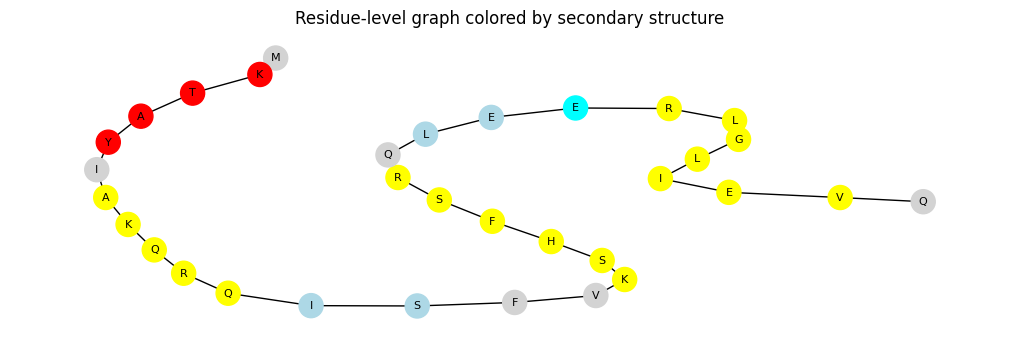

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
pdb_start = 13

for i, embedding in enumerate(embeddings):
    resseq = pdb_start + i
    ss = dssp_residues.get(resseq, ' ')
    aa = sequence[i]
    G.add_node(resseq, embedding=embedding.tolist(), ss=ss, aa=aa)
    G.nodes[resseq]['embedding'] = embeddings[i].cpu().numpy()

# edges between consecutive residues
for i in range(len(embeddings)-1):
    resseq1 = pdb_start + i
    resseq2 = pdb_start + i + 1
    G.add_edge(resseq1, resseq2)

color_map = {'H': 'red', 'E': 'yellow', '-': 'lightgray', ' ': 'lightgray', 'T':'lightblue', 'S':'cyan'}
node_colors = [color_map.get(G.nodes[n]['ss'], 'gray') for n in G.nodes]

plt.figure(figsize=(10, 3))
pos = nx.spring_layout(G, seed=42)
labels = {resseq: G.nodes[resseq]['aa'] for resseq in G.nodes}
nx.draw(G, pos,
        with_labels=True,
        labels=labels,
        node_color=node_colors,
        node_size=300,
        font_size=8)

plt.title('Residue-level graph colored by secondary structure')
plt.show()

In [ ]:
# SSEs: list of dicts [{'type': 'H', 'start': 13, 'end': 17}, ...]
sse_list = []
current_sse = None

for resseq in sorted(dssp_residues.keys()):
    ss = dssp_residues[resseq]
    if ss == ' ' or ss == '-':   # keep as loop
        ss = 'loop'
    elif ss in ['H', 'G', 'I']:
        ss = 'helix'
    elif ss in ['E', 'B']:
        ss = 'strand'
    else:
        ss = 'other'

    if current_sse is None:
        current_sse = {'type': ss, 'start': resseq, 'end': resseq}
    elif ss == current_sse['type']:
        current_sse['end'] = resseq
    else:
        sse_list.append(current_sse)
        current_sse = {'type': ss, 'start': resseq, 'end': resseq}

if current_sse:
    sse_list.append(current_sse)

print("SSE list:")
for sse in sse_list:
    print(sse)

SSE list:
{'type': 'loop', 'start': 13, 'end': 13}
{'type': 'helix', 'start': 14, 'end': 17}
{'type': 'loop', 'start': 18, 'end': 18}
{'type': 'strand', 'start': 19, 'end': 23}
{'type': 'other', 'start': 24, 'end': 25}
{'type': 'loop', 'start': 26, 'end': 27}
{'type': 'strand', 'start': 28, 'end': 33}
{'type': 'loop', 'start': 34, 'end': 34}
{'type': 'other', 'start': 35, 'end': 37}
{'type': 'strand', 'start': 38, 'end': 44}
{'type': 'loop', 'start': 45, 'end': 45}
{'type': 'other', 'start': 46, 'end': 49}
{'type': 'loop', 'start': 50, 'end': 51}
{'type': 'other', 'start': 52, 'end': 52}
{'type': 'loop', 'start': 53, 'end': 53}
{'type': 'strand', 'start': 54, 'end': 60}
{'type': 'loop', 'start': 61, 'end': 61}
{'type': 'other', 'start': 62, 'end': 63}
{'type': 'loop', 'start': 64, 'end': 65}
{'type': 'other', 'start': 66, 'end': 70}
{'type': 'strand', 'start': 71, 'end': 80}
{'type': 'loop', 'start': 81, 'end': 81}
{'type': 'other', 'start': 82, 'end': 83}
{'type': 'loop', 'start': 84,

I am in vecs part!
I am in vecs part!
I am in vecs part!
I am in vecs part!
I am in vecs part!
I am in vecs part!
I am in vecs part!
I am in vecs part!
I am in vecs part!
I am in vecs part!
I am in vecs part!


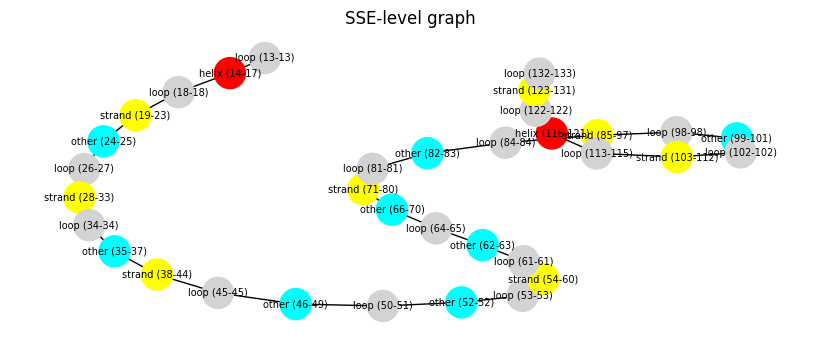

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G_sse = nx.Graph()

# nodes: label = (type, start, end)
for i, sse in enumerate(sse_list):
    node_id = i  # unique id
    G_sse.add_node(node_id, type=sse['type'], start=sse['start'], end=sse['end'])

# edges between consecutive SSEs
for i in range(len(sse_list)-1):
    G_sse.add_edge(i, i+1)

color_map_sse = {'helix': 'red', 'strand': 'yellow', 'loop': 'lightgray', 'other':'cyan'}
node_colors = [color_map_sse.get(G_sse.nodes[n]['type'], 'gray') for n in G_sse.nodes]

labels = {n: f"{G_sse.nodes[n]['type']} ({G_sse.nodes[n]['start']}-{G_sse.nodes[n]['end']})"
          for n in G_sse.nodes}

plt.figure(figsize=(8, 3))
pos = nx.spring_layout(G_sse, seed=42)

for node_id in G_sse.nodes:
    sse = G_sse.nodes[node_id]
    resseqs = range(sse['start'], sse['end'] + 1)
    vecs = [G.nodes[res]['embedding'] for res in resseqs if res in G.nodes and 'embedding' in G.nodes[res]]
    if vecs:
        print(f"I am in vecs part!")
        mean_vec = sum(vecs) / len(vecs)
        G_sse.nodes[node_id]['embedding'] = mean_vec

nx.draw(G_sse, pos,
        with_labels=True,
        labels=labels,
        node_color=node_colors,
        node_size=500,
        font_size=7)

plt.title('SSE-level graph')
plt.show()

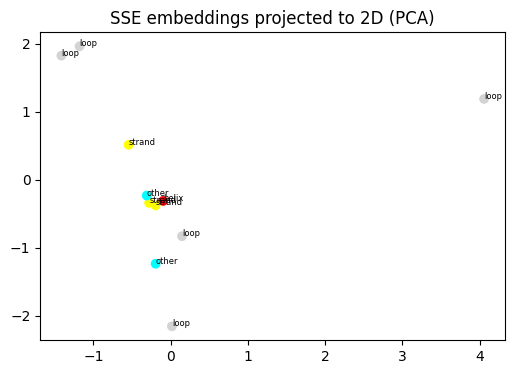

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

X = [G_sse.nodes[n]['embedding'] for n in G_sse.nodes if 'embedding' in G_sse.nodes[n]]
labels = [G_sse.nodes[n]['type'] for n in G_sse.nodes if 'embedding' in G_sse.nodes[n]]

# PCA to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

color_map_sse = {'helix': 'red', 'strand': 'yellow', 'loop': 'lightgray', 'other': 'cyan'}
colors = [color_map_sse.get(t, 'gray') for t in labels]

plt.figure(figsize=(6,4))
plt.scatter(X_2d[:,0], X_2d[:,1], c=colors)
for i, label in enumerate(labels):
    plt.text(X_2d[i,0], X_2d[i,1], label, fontsize=6)

plt.title('SSE embeddings projected to 2D (PCA)')
plt.show()